# Overview

Target Variable: Default

1 → Loan defaulted

0 → Loan repaid

Features:
Customer demographic and financial attributes such as age, income, loan amount, credit score, employment details, and loan characteristics.

Feature Types:

Numerical features (Age, Income, LoanAmount, CreditScore, etc.)

Categorical features (Education, EmploymentType, LoanPurpose, etc.)

Context:
Real-world financial risk assessment scenario used by banks and lending institutions to evaluate loan applications and minimize default risk.

 # Import all necessary libraries

In [508]:
#  Data Manipulation and Numerical Tools 
import pandas as pd  # Primary tool for loading datasets and creating dataframes
import numpy as np   # Used for high-level mathematical functions and array operations

#  Data Visualization Libraries 
import seaborn as sns          # Statistical data visualization library based on matplotlib
import matplotlib.pyplot as plt # Core library for creating static, animated, and interactive plots

#  Machine Learning: Scikit-Learn (sklearn) 
from sklearn.linear_model import LogisticRegression # The classification model used to predict loan default
from sklearn.metrics import accuracy_score          # Metric used to evaluate the model's performance
from sklearn.model_selection import train_test_split # Function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler    # Used to scale features to a standard range (Mean=0, Std=1)

from sklearn.metrics import confusion_matrix

# Dataset loading and exploration

In [486]:
#Loading the dataset into dataframe
df = pd.read_csv("Loan_default.csv")

In [487]:
#Data Exploration
#Exploring shape of df
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [488]:
#Counting null or missing values in each column
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

# Before Model 
Training and evaluating the accuracy of a basic model 

In [489]:
# Before model : using basic features only
basic_cols = ['Income', 'LoanAmount', 'CreditScore']
X_basic = df[basic_cols]
y_basic = df['Default']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_basic, y_basic, test_size=0.2, random_state=42)

model_basic = LogisticRegression(max_iter=1000)
model_basic.fit(Xb_train, yb_train)

pred_basic = model_basic.predict(Xb_test)
acc_basic = accuracy_score(yb_test, pred_basic)

In [490]:
print(acc_basic)
print(pred_basic)


0.8844722929312708
[0 0 0 ... 0 0 0]


# Feature Engineering

In [491]:
# Seperating target and features
target = 'Default'
y = df[target]
X = df.drop(columns=[target])

In [492]:
# drop loan ID
X = X.drop(columns=['LoanID'])


In [493]:
# Seperating numerical and catergorical features
num_cols= X.select_dtypes(include=['int64', 'float64']).columns
cat_cols= X.select_dtypes(include=['object', 'category']).columns
num_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

In [494]:
X[num_cols].describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


# Skewness Check

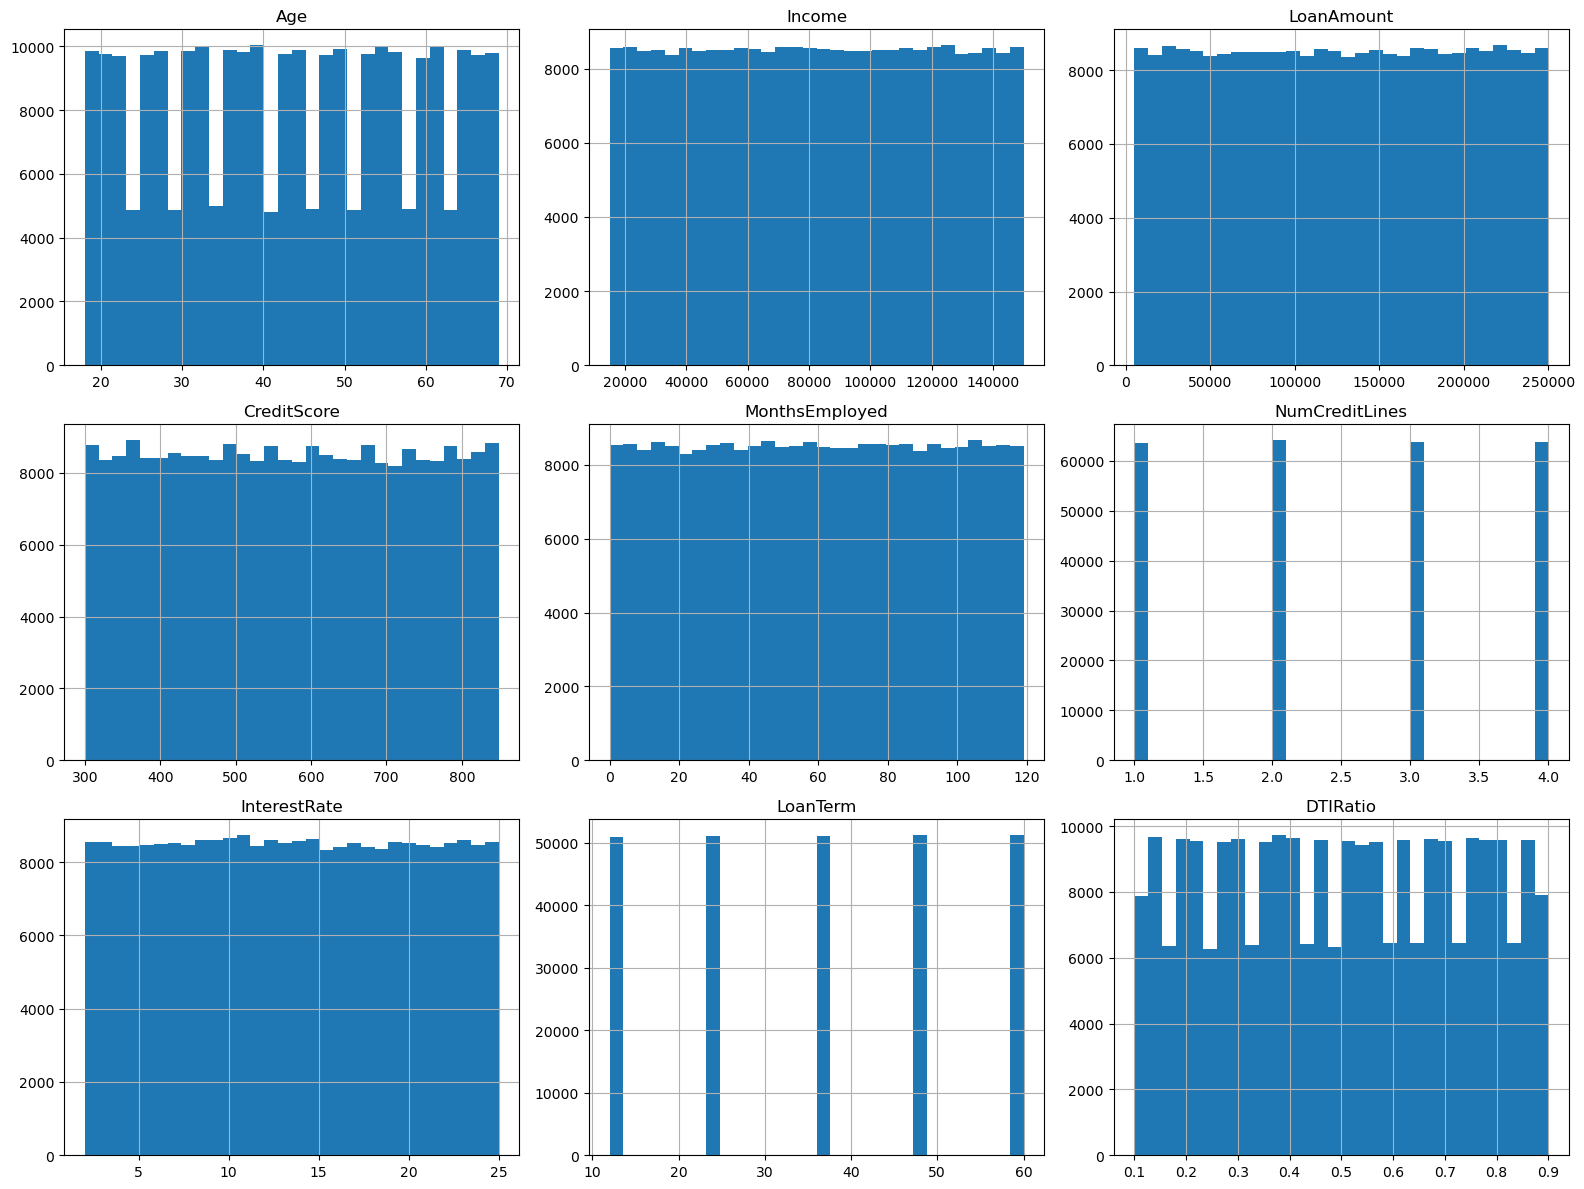

In [495]:
X[num_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()


In [496]:
for col in cat_cols:
    print(f"\n {col}")
    display(X[col].value_counts().to_frame(name='Count'))



 Education


,Count
Education,
Bachelor's,64366
High School,63903
Master's,63541
PhD,63537



 EmploymentType


,Count
EmploymentType,
Part-time,64161
Unemployed,63824
Self-employed,63706
Full-time,63656



 MaritalStatus


,Count
MaritalStatus,
Married,85302
Divorced,85033
Single,85012



 HasMortgage


,Count
HasMortgage,
Yes,127677
No,127670



 HasDependents


,Count
HasDependents,
Yes,127742
No,127605



 LoanPurpose


,Count
LoanPurpose,
Business,51298
Home,51286
Education,51005
Other,50914
Auto,50844



 HasCoSigner


,Count
HasCoSigner,
Yes,127701
No,127646


In [497]:
num_cols.isnull().sum()

np.int64(0)

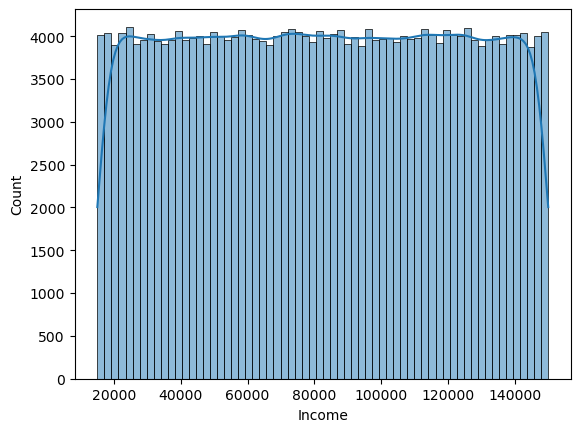

In [498]:
sns.histplot(X['Income'], kde=True)
plt.show()

In [499]:
# Inspecting skewing in Income data
X['Income'].skew()

np.float64(-0.00038051328464016096)

In [500]:
#derived feature which repesents loan to income ratio
X['loan_to_income'] = X['LoanAmount'] / X['Income']
X['loan_to_income']

0         0.588262
1         2.467481
2         1.534154
3         1.412638
4         0.447179
            ...   
255342    5.547329
255343    3.655208
255344    2.455718
255345    0.711734
255346    0.824382
Name: loan_to_income, Length: 255347, dtype: float64

In [501]:

# Categorical encoding
# Map yes -> 1 No-> 0
# only two possibilities for the folowing cols
pd.set_option('future.no_silent_downcasting', True)
binary_cols = ['HasMortgage','HasDependents','HasCoSigner']
X[binary_cols] = (
    X[binary_cols]
    .replace({'Yes': 1, 'No': 0})
    .infer_objects(copy=False)
)

In [502]:
# One-hot encoding performed 
X = pd.get_dummies(X, columns=['EmploymentType','LoanPurpose','MaritalStatus'], drop_first=True)

In [503]:
# 1. Map the categories (ensure all unique values are in education_map)
X['Education'] = X['Education'].map(education_map)

# 2. Correctly handle NaNs without the assignment bug
X['Education'] = X['Education'].fillna(X['Education'].median())

In [504]:
# Mapping HasCoSigner featuer to 1 & 0
X['HasCoSigner'] = (
    X['HasCoSigner']
    .replace({'Yes': 1, 'No': 0})
    .infer_objects(copy=False)
)

# Scaling and model training 

We use StandardScaler to ensure features with large ranges (like Income) do not dominate those with smaller ranges (like DTIRatio).

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling 
#Logistic Regression uses gradient descent; large numbers in Income would otherwise overpower small numbers in DTIRatio.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

np.isnan(X_test_scaled).sum()

np.int64(0)

In [509]:
#Training model on refined dataset
model_fe = LogisticRegression(max_iter=1000)
model_fe.fit(X_train_scaled, y_train)

pred_fe = model_fe.predict(X_test_scaled)
acc_fe = accuracy_score(y_test, pred_fe)

pred_fe , acc_fe

(array([0, 0, 0, ..., 0, 0, 0], shape=(51070,)), 0.8880360289798316)

# Performance Evaluation 



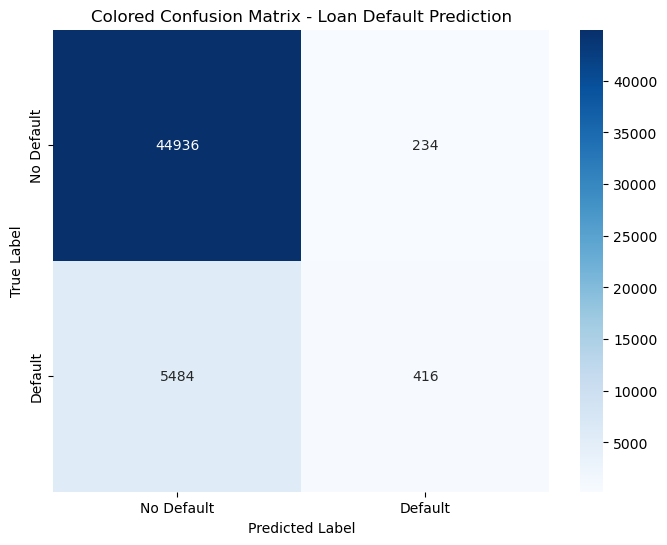

In [507]:
from sklearn.metrics import classification_report, confusion_matrix
# 1. Generate the confusion matrix data
cm = confusion_matrix(y_test, model_fe.predict(X_test_scaled))

# 2. Plotting the colored heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])

# 3. Adding labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Colored Confusion Matrix - Loan Default Prediction')
plt.show()

# Conclusions and Key Takeaways
Feature Engineering Techniques Applied:

Missing Value Handling:
Missing values were imputed using the median of training data to avoid data leakage and ensure numerical stability.

Ordinal Encoding:
The Education feature was ordinally encoded to preserve its natural ordering (High School < Bachelor < Master < PhD).

Binary Encoding:
Binary categorical features such as HasMortgage, HasDependents, and HasCoSigner were converted from Yes/No to 1/0.

One-Hot Encoding:
Nominal categorical features without inherent order (e.g., EmploymentType, LoanPurpose) were one-hot encoded.

Feature Alignment:
Train and test datasets were aligned after encoding to ensure consistent feature dimensions.

Feature Scaling:
Standardization was applied to numerical features using StandardScaler to normalize feature ranges.

Why Transformations Were Required:

Model Assumptions:
Logistic Regression assumes linear relationships between features and the target; proper encoding and scaling help satisfy this assumption.

Scale Differences:
Features like Income, LoanAmount, and CreditScore had different magnitudes; scaling ensured fair contribution from each feature.

Categorical Handling:
Machine learning models require numerical inputs; categorical features needed to be encoded appropriately.

Data Quality:
Handling missing values before scaling prevented runtime errors and unstable model behavior.

Models That Benefit:

Logistic Regression:
Strongly benefits from scaling, ordinal encoding, and well-prepared numerical features.

Distance-Based Models (KNN, SVM):
Benefit from standardized feature scales.

Tree-Based Models:
Less sensitive to scaling but still benefit from clean, well-engineered features.

Performance Impact:

Feature engineering improved model performance by enabling:

More meaningful numerical representations of categorical data

Stable and faster model convergence

Reduced noise and inconsistencies in the dataset

Better generalization on unseen test data